In [2]:
!pip install yfinance


     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/949.2 kB 342.7 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/949.2 kB 342.7 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/949.2 kB 342.7 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/949.2 kB 342.7 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/949.2 kB 342.7 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/949.2 kB 342.7 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/949.2 kB 342.7 kB/s eta 0:


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [5]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2010-01-01","2022-04-30", auto_adjust = True)
data.head()

Enter the code of the stock:  USD


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,USD,USD,USD,USD,USD
Date,,,,,
2010-01-04,0.702969,0.711717,0.691777,0.696254,13339200
2010-01-05,0.700323,0.710496,0.689743,0.704392,10843200
2010-01-06,0.696254,0.706631,0.691982,0.699510,15528000
2010-01-07,0.685267,0.694830,0.674076,0.690354,14270400
2010-01-08,0.702765,0.704596,0.677536,0.686691,14136000


Gets data from January 1st 2010 to April 30 2022

In [6]:
data.shape


(3103, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3103 entries, 2010-01-04 to 2022-04-29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, USD)   3103 non-null   float64
 1   (High, USD)    3103 non-null   float64
 2   (Low, USD)     3103 non-null   float64
 3   (Open, USD)    3103 non-null   float64
 4   (Volume, USD)  3103 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 145.5 KB


In [8]:
data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,USD,3103.0,4.451537e+00,5.437568e+00,0.466340,0.861327,1.879737,5.536082,2.791290e+01
High,USD,3103.0,4.541839e+00,5.576081e+00,0.485465,0.871713,1.901998,5.648719,2.900022e+01
Low,USD,3103.0,4.357066e+00,5.294271e+00,0.461049,0.849717,1.851437,5.461060,2.705893e+01
Open,USD,3103.0,4.458434e+00,5.451743e+00,0.481599,0.861327,1.876877,5.555890,2.813632e+01
Volume,USD,3103.0,1.784852e+06,4.068217e+06,0.000000,178000.000000,356800.000000,928800.000000,4.161120e+07


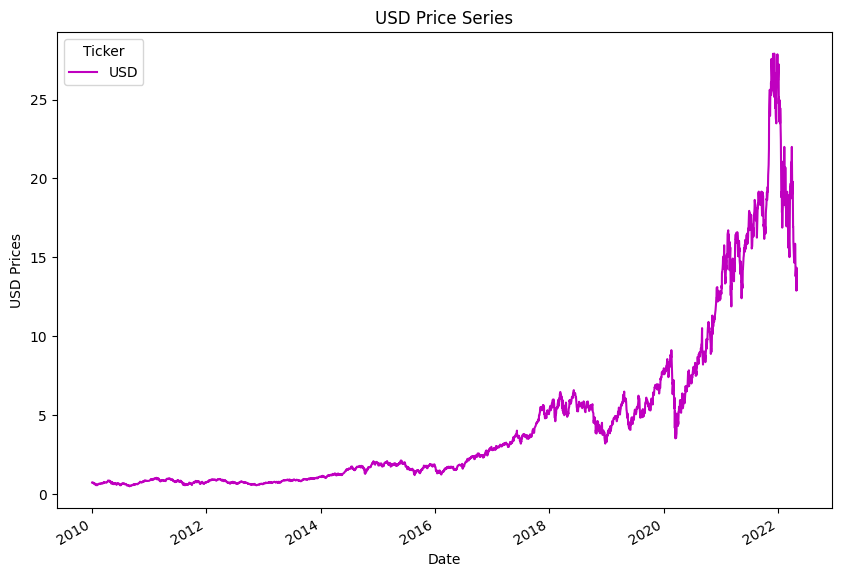

<Figure size 640x480 with 0 Axes>

In [9]:
data.Close.plot(figsize = (10, 7), color='m' )
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()
plt.savefig("plot1.png")

In [10]:
data.isnull().sum()

Price   Ticker
Close   USD       0
High    USD       0
Low     USD       0
Open    USD       0
Volume  USD       0
dtype: int64

<Axes: ylabel='Density'>

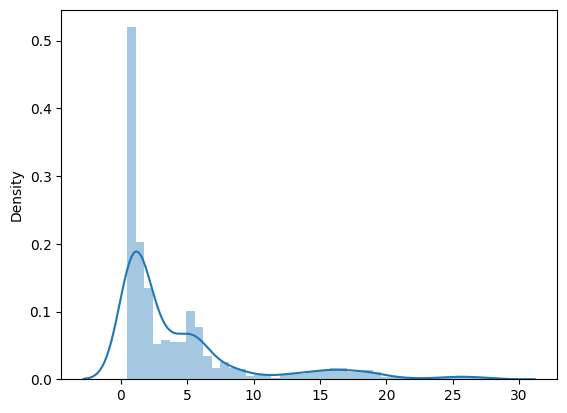

In [11]:
sns.distplot(data['Close'])

<Axes: ylabel='Density'>

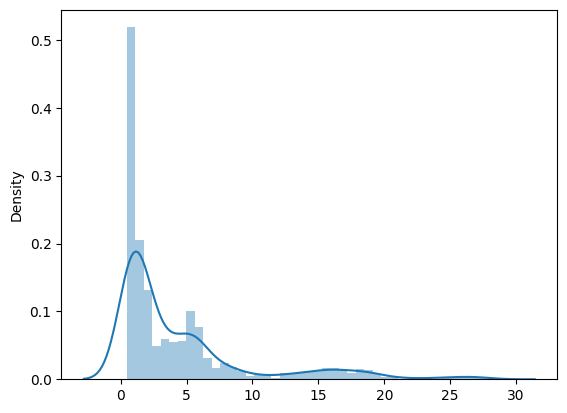

In [12]:
sns.distplot(data['Open'])

<Axes: ylabel='Density'>

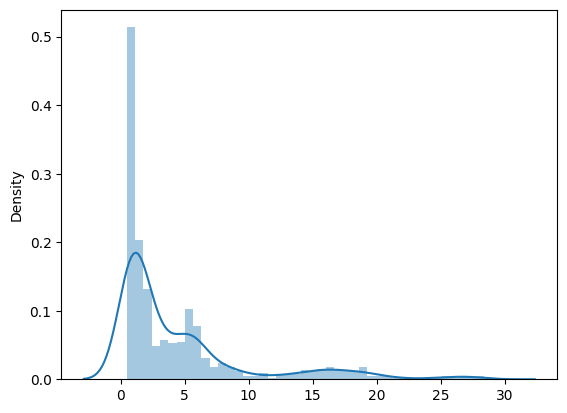

In [13]:
sns.distplot(data['High'])

We can see from the shape of the data and how the data is distributed that it is very non-linear

# Models to use:
Linear Regression, SVMs

In [14]:
X = data.drop("Close", axis = 1)
y = data.Close

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2482, 4)
(621, 4)
(2482, 1)
(621, 1)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
pred1 = linear_model.predict(X_test)

In [18]:
predictions = pd.DataFrame(pred1)
predictions.head()

,0
0,1.586278
1,4.586581
2,0.870418
3,0.645989
4,13.201178


In [19]:
y_test.head(5)

Ticker,USD
Date,
2014-08-14,1.587830
2017-10-25,4.621621
2011-03-25,0.860511
2012-12-19,0.637288
2022-04-26,12.998216


In [20]:
# Calculating the mean squared error and rmse and r2_score
from sklearn.metrics import r2_score, mean_squared_error
def calculate_metrics(y_test, pred1):
    """
    y_test = ground truth/ actual value
    y_pred = model predictions
    """
    mse = mean_squared_error(y_test, pred1)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred1)
    
    print("Mean Squared Error = ", mse)
    print("RMSE = ", rmse)
    print("R2_score = ", r2)

calculate_metrics(y_test, pred1)

Mean Squared Error =  0.011153900723243789
RMSE =  0.10561202925445468
R2_score =  0.9996180184528506


In [21]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso().fit(X_train, y_train)
ridge_model= Ridge().fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

In [22]:
calculate_metrics(y_test, lasso_pred)

Mean Squared Error =  0.06320833006504965
RMSE =  0.2514126688634637
R2_score =  0.9978353388370524


In [23]:
calculate_metrics(y_test, ridge_pred)

Mean Squared Error =  0.011336399075531472
RMSE =  0.10647252732762322
R2_score =  0.9996117685314384


In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


svr = SVR()

params = {"C": [0.1, 1, 10, 100, 1000],
         "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
          "kernel": ['rbf']
         }
grid = GridSearchCV(SVR(), params, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.186 total time=   1.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.203 total time=   0.9s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.200 total time=   0.9s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.168 total time=   0.9s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.213 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.171 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.186 total time=   0.9s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.184 total time=   0.9s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.147 total time=   0.8s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.199 total time=   0.9s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.174 total time=   1.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [27]:
svr = SVR(C = 1000, gamma = 0.0001, kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)# Use your trained linear model to predict
future_predictions = linear_model.predict(future_data)

# Combine predictions with dates
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_predictions})
future_df.set_index('Date', inplace=True)

df = pd.DataFrame(svr_pred)

In [28]:
import joblib
joblib.dump(linear_model, 'linear_model.pkl')

['linear_model.pkl']

In [29]:
def predict_price(Open, High, Low, Volume):
    test_data = np.array([[Open, High, Low, Volume]])
    trained_model = joblib.load("linear_model.pkl")
    prediction = trained_model.predict(test_data)
    return prediction
    
predict_price(100,220,3400,30000)

array([[-2092.43314565]])